<a href="https://colab.research.google.com/github/NombuleloZizi/Project2/blob/main/Nombulelo_Zizi_Project2_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import Libraries**

In [1006]:
import pandas as pd
import numpy as np
#import seaborn to make a nice heatmap for our confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
## import missingo
import missingno as msno
import seaborn as sns

pd.set_option('display.max_columns',100)

## **2. Project 2: Part 1**

- Author: Nombulelo Zizi

### 2.1 First choice: Stroke Prediction Dataset

#### 2.1.1 Load and inspect data

In [1007]:
stroke_url = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/healthcare-dataset-stroke-data.csv"
df_stroke = pd.read_csv(stroke_url)
df_stroke.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [1008]:
df_stroke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 2.1.2 Stroke dataset

1. Source of data

 - [Stroke prediction dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)


2. Brief description of data

  - This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status.

3. What is the target?

  - Stroke

5. Is this a classification or regression problem?

  - Classification

6. How many features does the data have?

  - We have a totla off 12 columns/features.

7. How many rows are in the dataset?

  - 5110

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

  - We need to drop unwanted columns, remove duplicates rows and impute missing values


### 2.2 Second choice: Car Insurance Data

#### 2.2.1 Load and inspect data

In [1009]:
car_insurance_url = "/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week08/Data/Car_Insurance_Claim.csv"
df_car_insurance = pd.read_csv(car_insurance_url)
df_car_insurance.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [1010]:
df_car_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

#### 2.2.2 Car Insurance Data

1. Source of data

 - [Car Insurance Data](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)


2. Brief description of data

  - The company has shared its annual car insurance data. Now, you have to find out the real customer behaviors over the data..

3. What is the target?

  - Outcome

5. Is this a classification or regression problem?

  - Classification

6. How many features does the data have?

  - We have a total off 18 columns/features.

7. How many rows are in the dataset?

  - 10000

8. What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

  - We need to drop unwanted columns, remove duplicates rows and impute missing values


## **3. Project 2: Part 2**

### 3.1 Stroke Prediction Dataset

In [1011]:
# Create a copy of the dataset for Modeling
df_ml = df_stroke.copy()

In [1012]:
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

#### 3.1.1 Clean the Data

In [1013]:
# convert column names to lower case to make them easier to remember.
df_stroke.columns = df_stroke.columns.str.lower()
df_stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##### Remove unnecessary columns

In [1014]:
# remove unnecessary columns
df_stroke.drop(columns=['id'], inplace=True)
df_stroke.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

##### Remove duplicates rows

In [1015]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_stroke.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


##### **Missing Values**

In [1016]:
#check data type
df_stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [1017]:
# Display the total number of missing values
print(f'There are {df_stroke.isna().sum().sum()} missing values.')

There are 201 missing values.


In [1018]:
null_sums = df_stroke.isna().sum()
null_sums

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [1019]:
# Let's investigate the rows with missing information
df_stroke.loc[df_stroke.isna().any(axis=1)]

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...
5039,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


In [1020]:
## Obtain summary statistics for the bmi
df_stroke.select_dtypes('number').describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [1021]:
## check the type of bmi
df_stroke['bmi'].dtype

dtype('float64')

Based on my finding, I will go with the safe option of using `mean` to fill in the missing values in the bmi column.

In [1022]:
col_means = df_stroke['bmi'].mean()
col_means

28.893236911794666

In [1023]:
df_stroke['bmi'] = df_stroke['bmi'].fillna(col_means)
df_stroke['bmi'].isna().sum()

0

In [1024]:
## check missing values
df_stroke.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##### **Incosistency Values**

In [1025]:
## check all the objects columns names
dtypes = df_stroke.dtypes
str_cols = dtypes[dtypes=='object'].index
str_cols

Index(['gender', 'ever_married', 'work_type', 'residence_type',
       'smoking_status'],
      dtype='object')

In [1026]:
## Obtain the value counts for all string columns
for col in str_cols:
  print(f"Value Counts for {col}")
  print(df_stroke[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for gender
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


Value Counts for ever_married
Yes    3353
No     1757
Name: ever_married, dtype: int64


Value Counts for work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Value Counts for residence_type
Urban    2596
Rural    2514
Name: residence_type, dtype: int64


Value Counts for smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64




#### **3.1.2 Univariate**

##### Number of stroke

Text(0.5, 1.0, '# stroke')

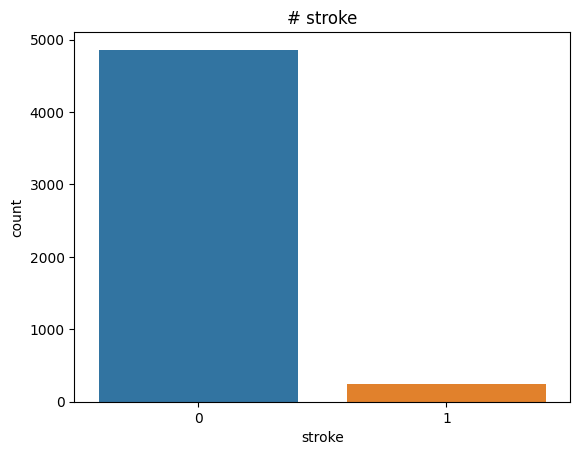

In [1027]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df_stroke['stroke'])
ax.set_title('# stroke')

##### Stroke vs Smoking status

<Axes: xlabel='smoking_status', ylabel='Count'>

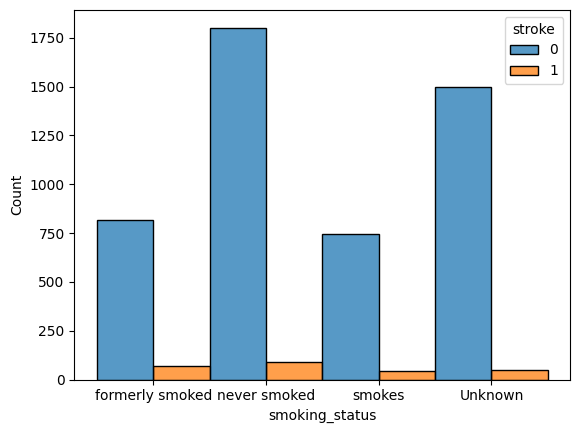

In [1028]:
sns.histplot(binwidth=1,
            hue=df_stroke['stroke'],
            x=df_stroke['smoking_status'],
            data=df_stroke,
            stat="count",
            multiple="dodge")

##### Stroke vs Hypertension

<Axes: xlabel='hypertension', ylabel='Count'>

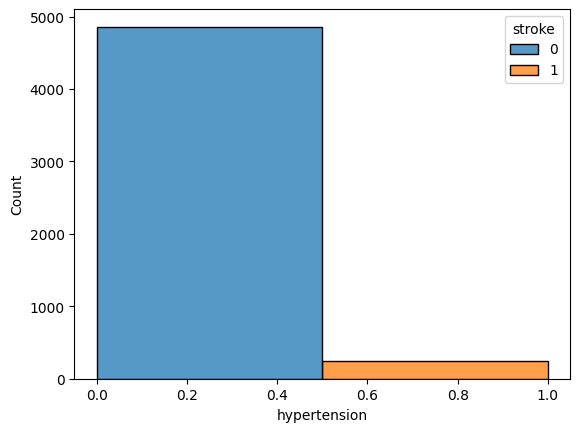

In [1029]:
# Create the histogram
sns.histplot(binwidth=1,
            hue=df_stroke['stroke'],
            x=df_stroke['hypertension'],
            data=df_stroke,
            stat="count",
            multiple="dodge")

##### Stroke vs Heart disease

<Axes: xlabel='heart_disease', ylabel='Count'>

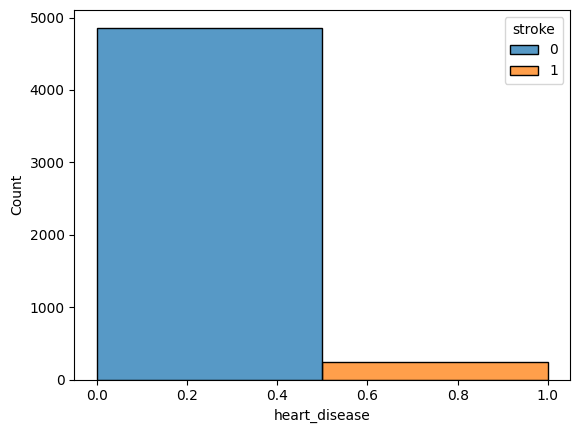

In [1030]:
sns.histplot(binwidth=1,
            hue=df_stroke['stroke'],
            x=df_stroke['heart_disease'],
            data=df_stroke,
            stat="count",
            multiple="dodge")

##### Stroke vs BMI

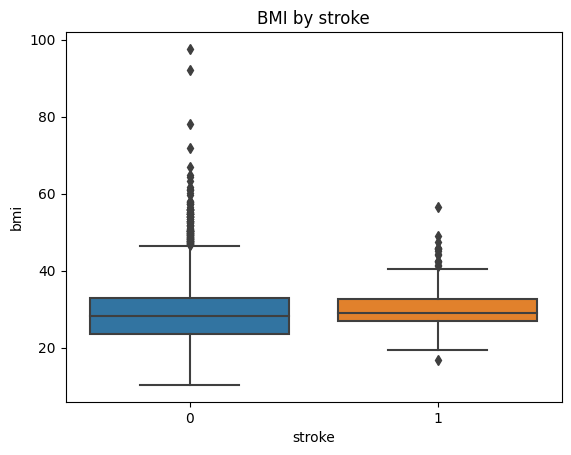

In [1031]:
# Create the boxplot
ax = sns.boxplot(x = 'stroke', y = 'bmi', data = df_stroke)
ax.set_title('BMI by stroke');

##### Stroke vs Gender

<Axes: xlabel='gender', ylabel='Count'>

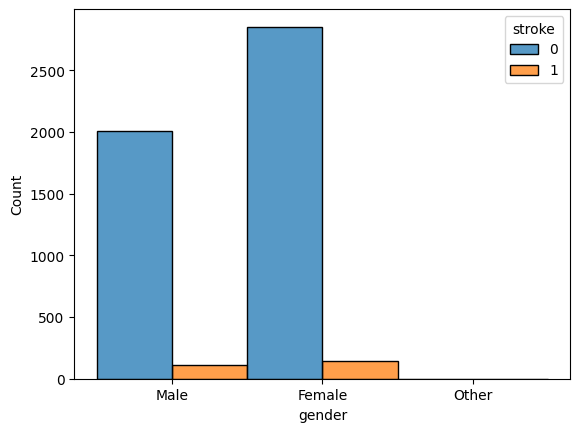

In [1032]:
sns.histplot(binwidth=1,
            hue=df_stroke['stroke'],
            x=df_stroke['gender'],
            data=df_stroke,
            stat="count",
            multiple="dodge")

##### Stroke vs Age

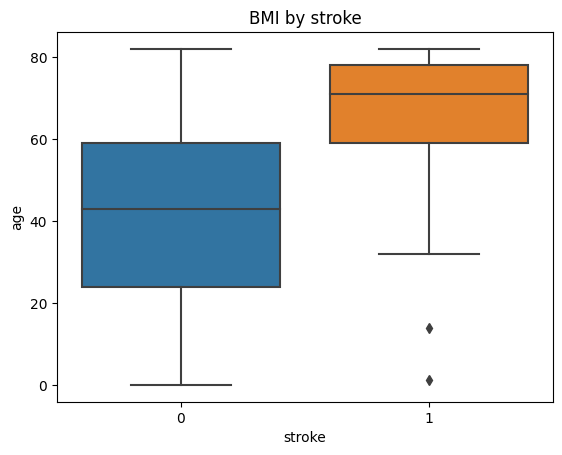

In [1033]:
# Create the boxplot
ax = sns.boxplot(x = 'stroke', y = 'age', data = df_stroke)
ax.set_title('BMI by stroke');

##### Stroke vs Glucose level

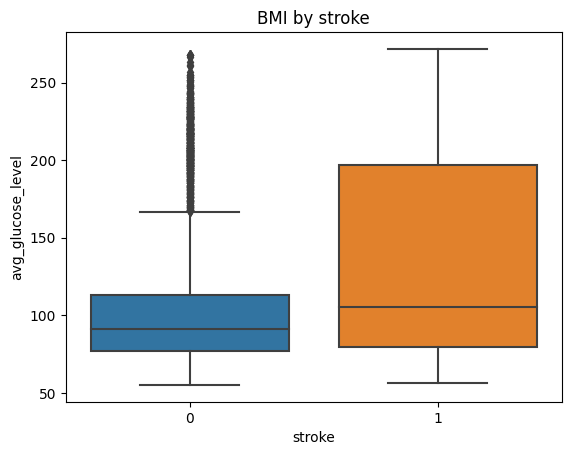

In [1034]:
ax = sns.boxplot(x = 'stroke', y = 'avg_glucose_level', data = df_stroke)
ax.set_title('BMI by stroke');

#### **3.1.3 Outliners**

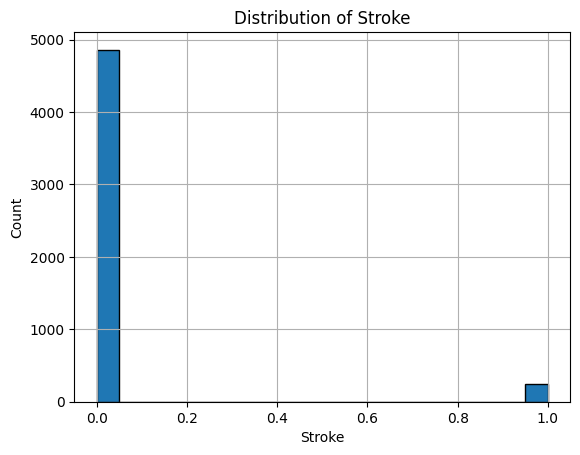

In [1035]:
# Create the histogram
ax = df_stroke['stroke'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Stroke')
ax.set_xlabel('Stroke')
ax.set_ylabel('Count');

### 3.2 Car Insurance Data

In [1036]:
# Create a copy of the dataset for Modeling
df_car_insurance._ml = df_car_insurance.copy()

<ipython-input-1036-1a9bd43d6d4d>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_car_insurance._ml = df_car_insurance.copy()


#### 3.2.1 Clean the Data

In [1037]:
# convert column names to lower case to make them easier to remember.

df_car_insurance.columns = df_car_insurance.columns.str.lower()
df_car_insurance.columns

Index(['id', 'age', 'gender', 'race', 'driving_experience', 'education',
       'income', 'credit_score', 'vehicle_ownership', 'vehicle_year',
       'married', 'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

##### Remove unnecessary columns

In [1038]:
# remove unnecessary columns
df_car_insurance.drop(columns=['id'], inplace=True)
df_car_insurance.columns

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'credit_score', 'vehicle_ownership', 'vehicle_year', 'married',
       'children', 'postal_code', 'annual_mileage', 'vehicle_type',
       'speeding_violations', 'duis', 'past_accidents', 'outcome'],
      dtype='object')

##### Remove duplicates rows

In [1039]:
# Display the number of duplicate rows in the dataset
print(f'There are {df_car_insurance.duplicated().sum()} duplicate rows.')

There are 12 duplicate rows.


##### **Missing Values**

In [1040]:
df_car_insurance.dtypes

age                     object
gender                  object
race                    object
driving_experience      object
education               object
income                  object
credit_score           float64
vehicle_ownership      float64
vehicle_year            object
married                float64
children               float64
postal_code              int64
annual_mileage         float64
vehicle_type            object
speeding_violations      int64
duis                     int64
past_accidents           int64
outcome                float64
dtype: object

In [1041]:
# Display the total number of missing values
print(f'There are {df_car_insurance.isna().sum().sum()} missing values.')

There are 1939 missing values.


In [1042]:
null_sums = df_car_insurance.isna().sum()
null_sums

age                      0
gender                   0
race                     0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64

In [1043]:
# Let's investigate the rows with missing information
df_car_insurance.loc[df_car_insurance.isna().any(axis=1)]

,age,gender,race,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
13,16-25,female,majority,0-9y,university,upper class,0.591260,1.0,before 2015,0.0,1.0,10238,NaN,sedan,0,0,0,0.0
15,26-39,female,majority,0-9y,high school,upper class,0.762798,0.0,after 2015,1.0,0.0,10238,NaN,sedan,0,0,0,0.0
16,65+,male,majority,30y+,university,upper class,0.796175,1.0,before 2015,1.0,1.0,32765,NaN,sedan,10,2,1,0.0
17,16-25,male,majority,0-9y,none,poverty,NaN,0.0,before 2015,1.0,0.0,32765,12000.0,sedan,0,0,0,1.0
18,26-39,female,majority,0-9y,university,upper class,0.680594,1.0,before 2015,0.0,1.0,32765,NaN,sedan,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,65+,male,minority,0-9y,none,upper class,0.710640,1.0,after 2015,0.0,1.0,32765,NaN,sedan,0,0,0,0.0
9981,26-39,male,majority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9985,16-25,male,minority,0-9y,high school,working class,NaN,1.0,before 2015,0.0,1.0,10238,11000.0,sedan,0,0,0,0.0
9988,26-39,male,majority,10-19y,high school,poverty,NaN,0.0,before 2015,0.0,0.0,10238,NaN,sedan,1,0,2,1.0


In [1044]:
## Obtain summary statistics
df_car_insurance.select_dtypes('number').describe()

,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Based on my finding, I will go with the safe option of using `mean` to fill in the missing values in the bmi column.

In [1045]:
df_car_insurance['credit_score'] = df_car_insurance['credit_score'].fillna(col_means)
df_car_insurance['credit_score'].isna().sum()

0

In [1046]:
df_car_insurance['annual_mileage'] = df_car_insurance['annual_mileage'].fillna(col_means)
df_car_insurance['annual_mileage'].isna().sum()

0

In [1047]:
## check missing values
df_car_insurance.isna().sum()

age                    0
gender                 0
race                   0
driving_experience     0
education              0
income                 0
credit_score           0
vehicle_ownership      0
vehicle_year           0
married                0
children               0
postal_code            0
annual_mileage         0
vehicle_type           0
speeding_violations    0
duis                   0
past_accidents         0
outcome                0
dtype: int64

##### **Incosistency Values**

In [1048]:
## check all the objects columns names
#dtypes_insurance = df_car_insurance.dtypes
#str_cols_insurance = df_car_insurance[dtypes_insurance=='object'].index
#str_cols_insurance

cat_cols_insurance = df_car_insurance.select_dtypes('object').columns
cat_cols_insurance

Index(['age', 'gender', 'race', 'driving_experience', 'education', 'income',
       'vehicle_year', 'vehicle_type'],
      dtype='object')

In [1049]:
## Obtain the value counts for all string columns
## Obtain the value counts for all string columns
for col in cat_cols_insurance:
  print(f"Value Counts for {col}")
  print(df_car_insurance[col].value_counts())
  # Increasing readability by adding an empty line
  print('\n')

Value Counts for age
26-39    3063
40-64    2931
16-25    2016
65+      1990
Name: age, dtype: int64


Value Counts for gender
female    5010
male      4990
Name: gender, dtype: int64


Value Counts for race
majority    9012
minority     988
Name: race, dtype: int64


Value Counts for driving_experience
0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64


Value Counts for education
high school    4157
university     3928
none           1915
Name: education, dtype: int64


Value Counts for income
upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64


Value Counts for vehicle_year
before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64


Value Counts for vehicle_type
sedan         9523
sports car     477
Name: vehicle_type, dtype: int64




#### **3.2.2 Univariate**

##### Number of outcome

Text(0.5, 1.0, '# Outcome')

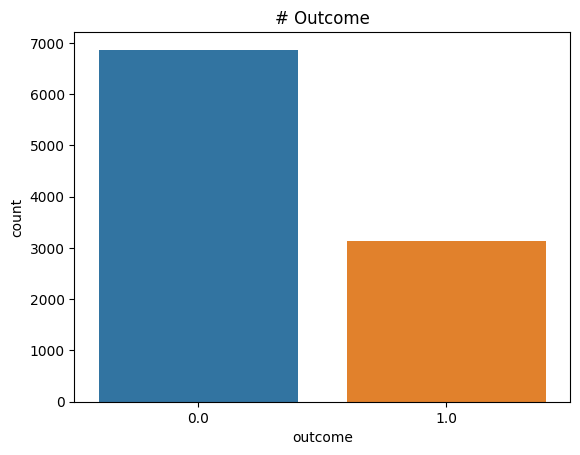

In [1050]:
# Check univariate distributions and explore categorical variable(s)
ax = sns.countplot(x=df_car_insurance['outcome'])
ax.set_title('# Outcome')

##### Outcome vs Past accidents

<Axes: xlabel='past_accidents', ylabel='Count'>

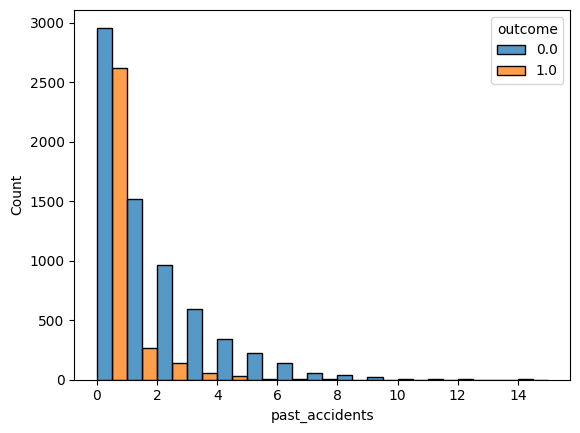

In [1051]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['past_accidents'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Credit score

<Axes: xlabel='credit_score', ylabel='Count'>

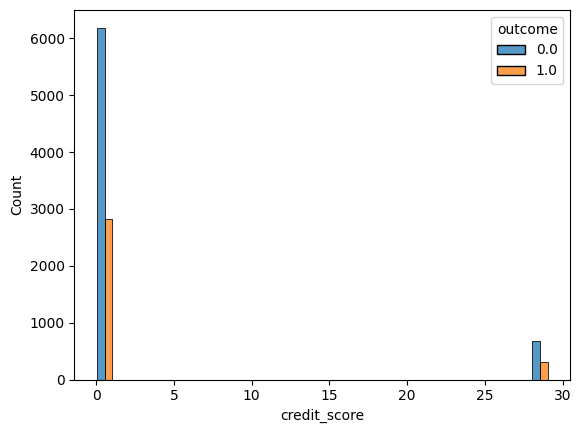

In [1052]:
# Create the histogram
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['credit_score'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Speeding violations

<Axes: xlabel='speeding_violations', ylabel='Count'>

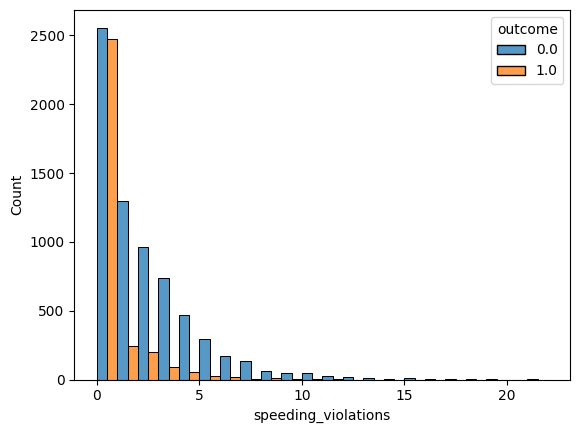

In [1053]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['speeding_violations'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Income

<Axes: xlabel='income', ylabel='Count'>

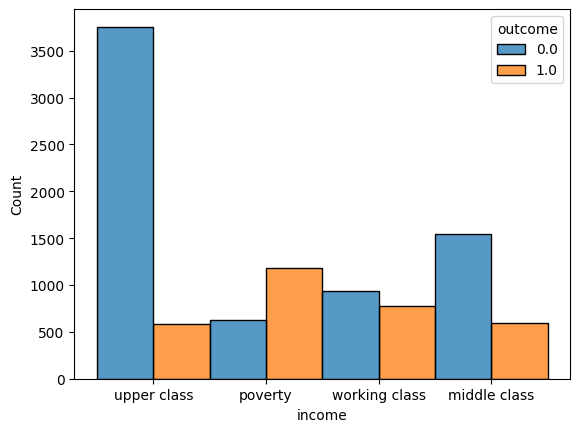

In [1054]:
# Create the boxplot
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['income'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Ownership

<Axes: xlabel='vehicle_ownership', ylabel='Count'>

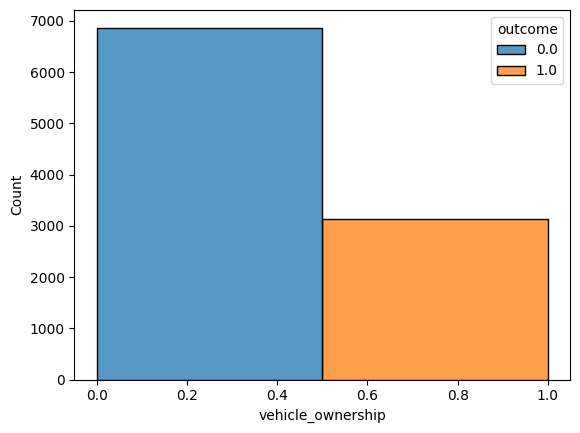

In [1055]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['vehicle_ownership'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Oucome vs Vehicle year

<Axes: xlabel='vehicle_year', ylabel='Count'>

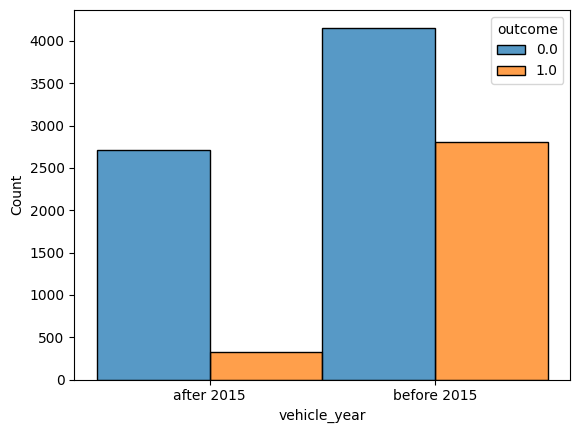

In [1056]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['vehicle_year'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome by Milage

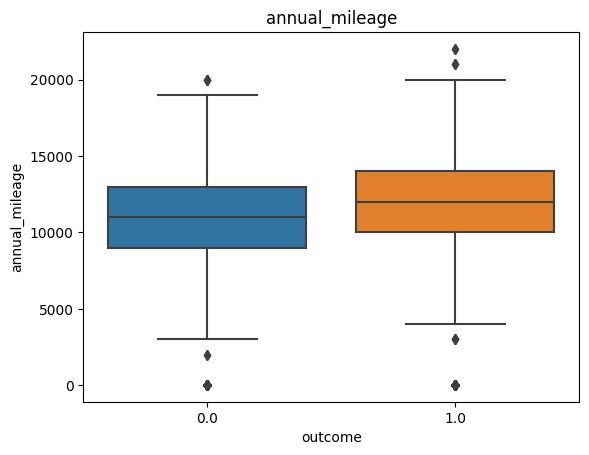

In [1057]:
ax = sns.boxplot(x = 'outcome', y = 'annual_mileage', data = df_car_insurance)
ax.set_title('annual_mileage');

##### Outcome by Experience

<Axes: xlabel='driving_experience', ylabel='Count'>

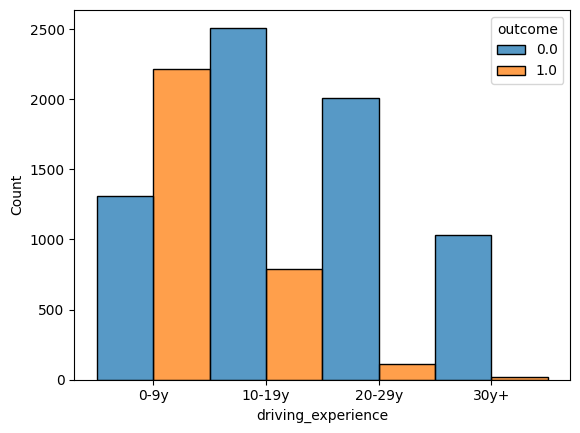

In [1058]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['driving_experience'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs vehicle_type

<Axes: xlabel='vehicle_type', ylabel='Count'>

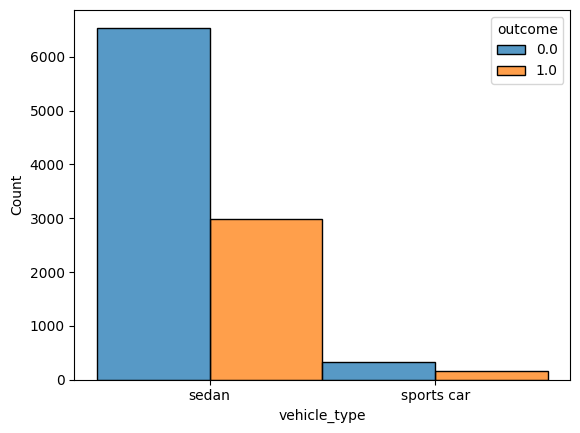

In [1059]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['vehicle_type'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Age

<Axes: xlabel='age', ylabel='Count'>

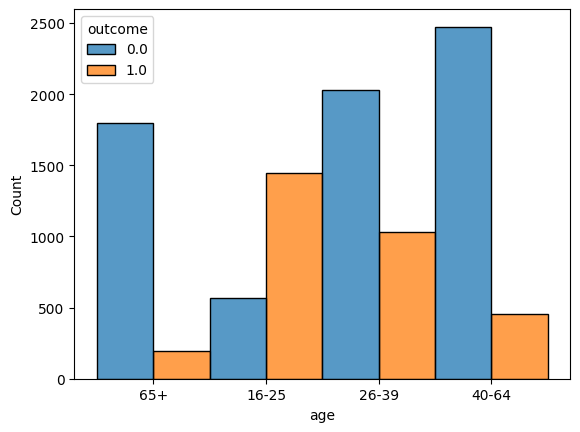

In [1060]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['age'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Gender

<Axes: xlabel='gender', ylabel='Count'>

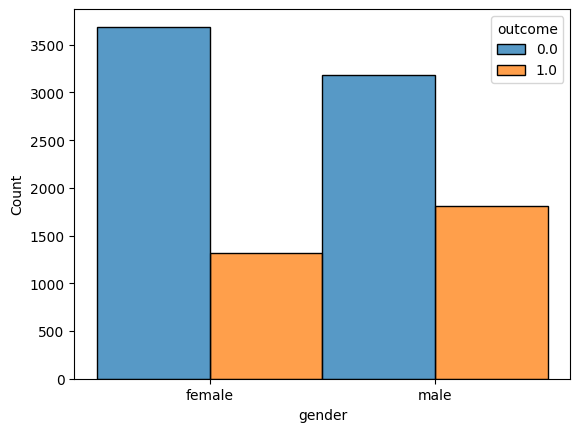

In [1061]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['gender'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

Race

<Axes: xlabel='driving_experience', ylabel='Count'>

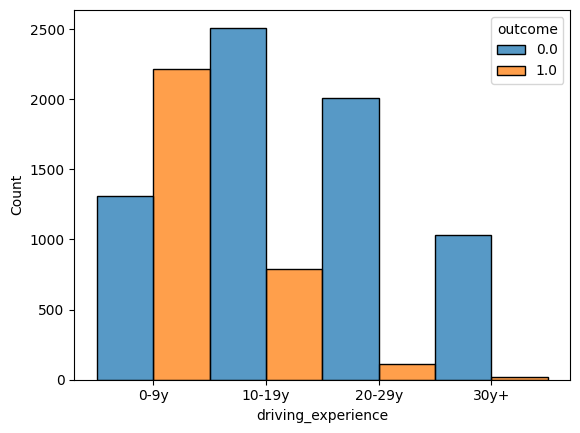

In [1062]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['driving_experience'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Education

<Axes: xlabel='education', ylabel='Count'>

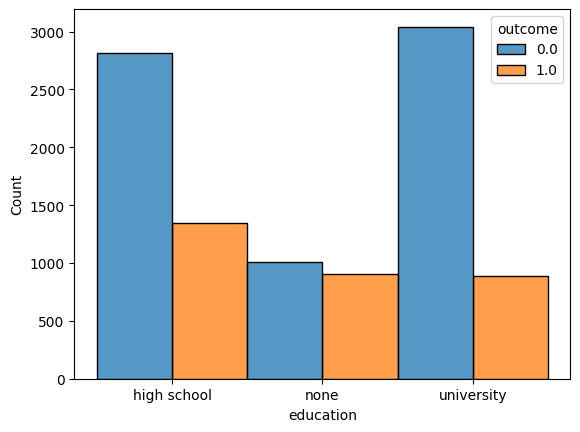

In [1063]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['education'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Married

<Axes: xlabel='married', ylabel='Count'>

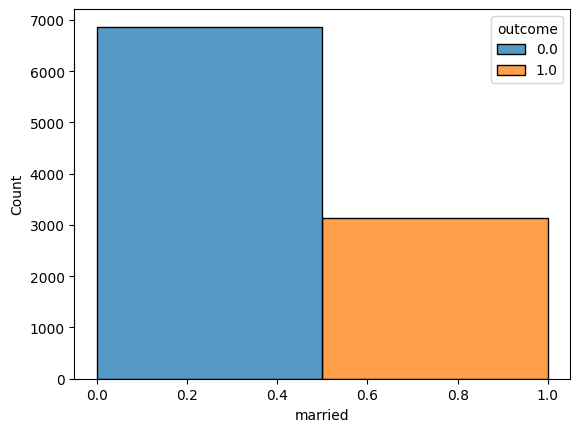

In [1064]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['married'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Duis

<Axes: xlabel='duis', ylabel='Count'>

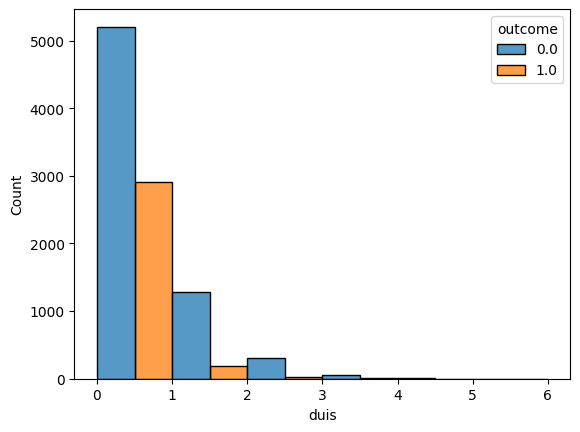

In [1065]:
sns.histplot(binwidth=1,
            hue=df_car_insurance['outcome'],
            x=df_car_insurance['duis'],
            data=df_car_insurance,
            stat="count",
            multiple="dodge")

##### Outcome vs Postal code

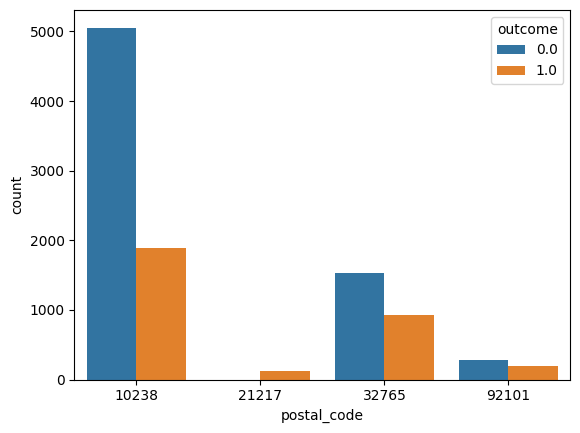

In [1066]:
# Seaborn countplot
ax = sns.countplot(data=df_car_insurance, x="postal_code", hue=df_car_insurance['outcome'])

##### Outcome vs Children

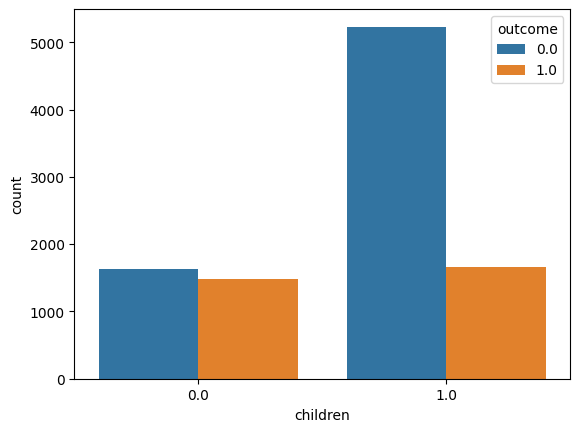

In [1067]:
# Seaborn countplot
ax = sns.countplot(data=df_car_insurance, x="children", hue=df_car_insurance['outcome'])

#### **3.1.3 Outliners**

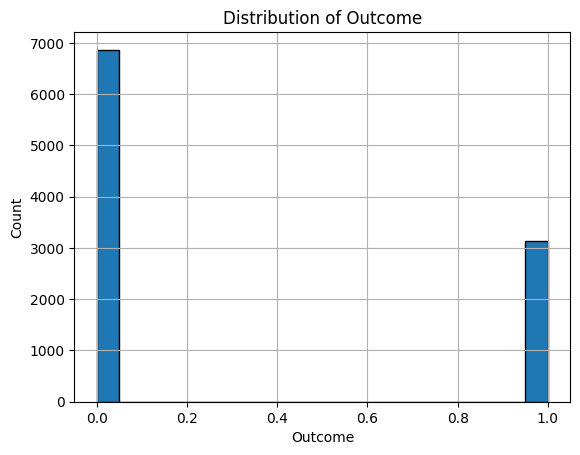

In [1068]:
# Create the histogram
ax = df_car_insurance['outcome'].hist(bins =20, edgecolor = 'black')
ax.set_title('Distribution of Outcome')
ax.set_xlabel('Outcome')
ax.set_ylabel('Count');